In [3]:
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/TAD/Last Delivery


Mounted at /content/drive
/content/drive/My Drive/TAD/Last Delivery


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
bank  = pd.read_csv("bank_data_v1.csv",delimiter=",")
display(bank)

,age,job,marital,education,credit,housing,loan,months,day_of_week,n_contacts_campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,outcome,duration,pdays,n_contacts_previous
0,56,housemaid,married,basic_4y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,261,999,0
1,37,services,married,high_school,no,yes,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,226,999,0
2,40,admin,married,basic_6y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,151,999,0
3,56,services,married,high_school,no,no,yes,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,307,999,0
4,59,admin,married,professional_course,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,139,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional_course,no,yes,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,334,999,0
30484,46,blue_collar,married,professional_course,no,no,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,383,999,0
30485,56,retired,married,university_degree,no,yes,no,nov,fri,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,189,999,0
30486,44,technician,married,professional_course,no,no,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,442,999,0


In [6]:
display(bank)
print(bank["pdays"].unique())
bank["pdays"]=bank["pdays"].replace([999],0)
print(bank["pdays"].unique())
categorical_values = bank.select_dtypes(exclude = 'number')
display(categorical_values)
numerical_values=bank.select_dtypes(include='number')
display(numerical_values)

,age,job,marital,education,credit,housing,loan,months,day_of_week,n_contacts_campaign,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,outcome,duration,pdays,n_contacts_previous
0,56,housemaid,married,basic_4y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,261,999,0
1,37,services,married,high_school,no,yes,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,226,999,0
2,40,admin,married,basic_6y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,151,999,0
3,56,services,married,high_school,no,no,yes,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,307,999,0
4,59,admin,married,professional_course,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,139,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional_course,no,yes,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,334,999,0
30484,46,blue_collar,married,professional_course,no,no,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,383,999,0
30485,56,retired,married,university_degree,no,yes,no,nov,fri,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,189,999,0
30486,44,technician,married,professional_course,no,no,no,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,442,999,0


[999   6   4   5   1   0   3  10   7   9  11   8   2  12  13  14  15  16
  21  17  18  22  25  26  19  27]
[ 0  6  4  5  1  3 10  7  9 11  8  2 12 13 14 15 16 21 17 18 22 25 26 19
 27]


,job,marital,education,credit,housing,loan,months,day_of_week,poutcome,outcome
0,housemaid,married,basic_4y,no,no,no,may,mon,nonexistent,no
1,services,married,high_school,no,yes,no,may,mon,nonexistent,no
2,admin,married,basic_6y,no,no,no,may,mon,nonexistent,no
3,services,married,high_school,no,no,yes,may,mon,nonexistent,no
4,admin,married,professional_course,no,no,no,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...
30483,retired,married,professional_course,no,yes,no,nov,fri,nonexistent,yes
30484,blue_collar,married,professional_course,no,no,no,nov,fri,nonexistent,no
30485,retired,married,university_degree,no,yes,no,nov,fri,nonexistent,no
30486,technician,married,professional_course,no,no,no,nov,fri,nonexistent,yes


,age,n_contacts_campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,duration,pdays,n_contacts_previous
0,56,1,1.1,93.994,-36.4,4.857,5191.0,261,0,0
1,37,1,1.1,93.994,-36.4,4.857,5191.0,226,0,0
2,40,1,1.1,93.994,-36.4,4.857,5191.0,151,0,0
3,56,1,1.1,93.994,-36.4,4.857,5191.0,307,0,0
4,59,1,1.1,93.994,-36.4,4.857,5191.0,139,0,0
...,...,...,...,...,...,...,...,...,...,...
30483,73,1,-1.1,94.767,-50.8,1.028,4963.6,334,0,0
30484,46,1,-1.1,94.767,-50.8,1.028,4963.6,383,0,0
30485,56,2,-1.1,94.767,-50.8,1.028,4963.6,189,0,0
30486,44,1,-1.1,94.767,-50.8,1.028,4963.6,442,0,0


In [7]:
categorical_values = bank.select_dtypes(exclude = 'number')
display(categorical_values)
numerical_values=bank.select_dtypes(include='number')
display(numerical_values)


,job,marital,education,credit,housing,loan,months,day_of_week,poutcome,outcome
0,housemaid,married,basic_4y,no,no,no,may,mon,nonexistent,no
1,services,married,high_school,no,yes,no,may,mon,nonexistent,no
2,admin,married,basic_6y,no,no,no,may,mon,nonexistent,no
3,services,married,high_school,no,no,yes,may,mon,nonexistent,no
4,admin,married,professional_course,no,no,no,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...
30483,retired,married,professional_course,no,yes,no,nov,fri,nonexistent,yes
30484,blue_collar,married,professional_course,no,no,no,nov,fri,nonexistent,no
30485,retired,married,university_degree,no,yes,no,nov,fri,nonexistent,no
30486,technician,married,professional_course,no,no,no,nov,fri,nonexistent,yes


,age,n_contacts_campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,duration,pdays,n_contacts_previous
0,56,1,1.1,93.994,-36.4,4.857,5191.0,261,0,0
1,37,1,1.1,93.994,-36.4,4.857,5191.0,226,0,0
2,40,1,1.1,93.994,-36.4,4.857,5191.0,151,0,0
3,56,1,1.1,93.994,-36.4,4.857,5191.0,307,0,0
4,59,1,1.1,93.994,-36.4,4.857,5191.0,139,0,0
...,...,...,...,...,...,...,...,...,...,...
30483,73,1,-1.1,94.767,-50.8,1.028,4963.6,334,0,0
30484,46,1,-1.1,94.767,-50.8,1.028,4963.6,383,0,0
30485,56,2,-1.1,94.767,-50.8,1.028,4963.6,189,0,0
30486,44,1,-1.1,94.767,-50.8,1.028,4963.6,442,0,0


No, you shouldn't normalize categorical data.
If the feature is categorical, it means that each value has a separate meaning, so normalizing will turn this features into something different.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scale = StandardScaler()
le = LabelEncoder()
numerical_values_scaled = scale.fit_transform(numerical_values)
display(numerical_values_scaled)
new_cat_values = categorical_values.copy()
columns = new_cat_values.columns

for i in range(categorical_values.shape[1]):
    label = le.fit_transform(new_cat_values[columns[i]])
    new_cat_values.drop(columns[i],axis=1,inplace = True)
    new_cat_values[columns[i]] = label
df_num_val = pd.DataFrame(numerical_values_scaled,columns = numerical_values.columns)
total_columns = pd.concat([df_num_val, new_cat_values], axis=1)
display(total_columns)

array([[ 1.64225272, -0.55933525,  0.72747746, ...,  0.00579232,
        -0.1775135 , -0.3716159 ],
       [-0.19645225, -0.55933525,  0.72747746, ..., -0.12794351,
        -0.1775135 , -0.3716159 ],
       [ 0.09386958, -0.55933525,  0.72747746, ..., -0.41452029,
        -0.1775135 , -0.3716159 ],
       ...,
       [ 1.64225272, -0.19170249, -0.63866561, ..., -0.26932139,
        -0.1775135 , -0.3716159 ],
       [ 0.48096537, -0.55933525, -0.63866561, ...,  0.69739761,
        -0.1775135 , -0.3716159 ],
       [ 3.38418375,  0.17593026, -0.63866561, ..., -0.0782702 ,
        -0.1775135 ,  1.54123665]])

,age,n_contacts_campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,duration,pdays,n_contacts_previous,job,marital,education,credit,housing,loan,months,day_of_week,poutcome,outcome
0,1.642253,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,0.005792,-0.177513,-0.371616,3,1,0,0,0,0,6,1,1,0
1,-0.196452,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.127944,-0.177513,-0.371616,7,1,3,0,1,0,6,1,1,0
2,0.093870,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.414520,-0.177513,-0.371616,0,1,1,0,0,0,6,1,1,0
3,1.642253,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,0.181559,-0.177513,-0.371616,7,1,3,0,0,1,6,1,1,0
4,1.932575,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.460373,-0.177513,-0.371616,0,1,5,0,0,0,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,3.287410,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,0.284727,-0.177513,-0.371616,5,1,5,0,1,0,7,0,1,1
30484,0.674513,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,0.471957,-0.177513,-0.371616,1,1,5,0,0,0,7,0,1,0
30485,1.642253,-0.191702,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.269321,-0.177513,-0.371616,5,1,6,0,1,0,7,0,1,0
30486,0.480965,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,0.697398,-0.177513,-0.371616,9,1,5,0,0,0,7,0,1,1


Index(['age', 'n_contacts_campaign', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'duration', 'pdays',
       'n_contacts_previous', 'job', 'marital', 'education', 'credit',
       'housing', 'loan', 'months', 'day_of_week', 'poutcome', 'outcome'],
      dtype='object')


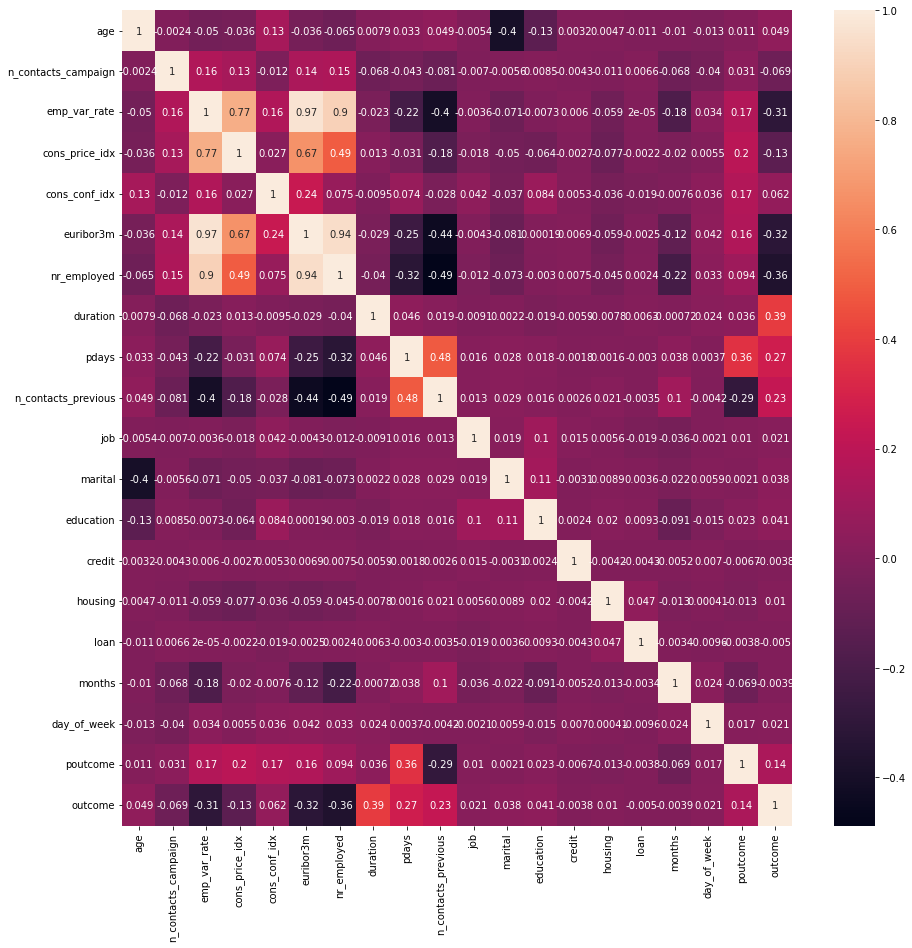

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
print(total_columns.columns)
df_corr=total_columns.corr()
sns.heatmap(df_corr,annot=True)

In [10]:
y = total_columns["outcome"]
display(y)
x = total_columns.drop(['outcome','months','day_of_week','duration'],axis=1)
display(x)



0        0
1        0
2        0
3        0
4        0
        ..
30483    1
30484    0
30485    0
30486    1
30487    0
Name: outcome, Length: 30488, dtype: int64

,age,n_contacts_campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,pdays,n_contacts_previous,job,marital,education,credit,housing,loan,poutcome
0,1.642253,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.177513,-0.371616,3,1,0,0,0,0,1
1,-0.196452,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.177513,-0.371616,7,1,3,0,1,0,1
2,0.093870,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.177513,-0.371616,0,1,1,0,0,0,1
3,1.642253,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.177513,-0.371616,7,1,3,0,0,1,1
4,1.932575,-0.559335,0.727477,0.804095,0.877451,0.786102,0.401648,-0.177513,-0.371616,0,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,3.287410,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.177513,-0.371616,5,1,5,0,1,0,1
30484,0.674513,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.177513,-0.371616,1,1,5,0,0,0,1
30485,1.642253,-0.191702,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.177513,-0.371616,5,1,6,0,1,0,1
30486,0.480965,-0.559335,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.177513,-0.371616,9,1,5,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=0,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
Y_train.to_csv("Y_train.csv")
X_train.to_csv("X_train.csv")

(21341, 16)
(9147, 16)
(21341,)
(9147,)


In [12]:
def param(model,param_grid,X_train,Y_train):
  clf = HalvingGridSearchCV(model, param_grid,
                              min_resources="exhaust", 
                              factor=3,
                              n_jobs=-1, 
                              verbose=2,
                              error_score=0.0,
                              random_state=0,cv=3)

  #train with set train and test with the validation set: Validation Set 
  clf.fit(X_train,Y_train)

  return clf

In [13]:
param_grid = {
    "n_estimators": [100,200,400,500], #number of trees in the forest of the model
    "max_depth": [4,6,8,None], #max depth of each tree; default value=NONE (each tree expand until every leaf is pure(all the data leaf comes from the same class)
    "min_samples_split": [2, 5, 8], #number mininum of samples required to split
    "min_samples_leaf":[1, 2,10], #mininum number of samples required to be at a leaf node
    "bootstrap" :[False,True],
    "max_samples":[500,1000,5000,9000,None]
}
print(Y_train.shape)
model_forest = param(RandomForestClassifier(),param_grid,X_train,Y_train)
print(model_forest.best_params_)

(21341,)
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 29
max_resources_: 21341
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1440
n_resources: 29
Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3456 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1728 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

--------------------------------------------------------------------------

----------
iter: 1
n_candidates: 480
n_resources: 87
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
576 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
465 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

----------------------------------------------------------------------------

----------
iter: 2
n_candidates: 160
n_resources: 261
Fitting 3 folds for each of 160 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 54
n_resources: 783
Fitting 3 folds for each of 54 candidates, totalling 162 fits
----------
iter: 4
n_candidates: 18
n_resources: 2349
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 5
n_candidates: 6
n_resources: 7047
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 6
n_candidates: 2
n_resources: 21141
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'bootstrap': True, 'max_depth': None, 'max_samples': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 400}


In [14]:
param_grid = {
    "penalty": ['l1','l2','elasticnet',None],
    "C": [0.1,1,5], 
    "solver": ["lbfgs", "liblinear","sag", "saga"], 
}
print(Y_train.shape)
model_lr = param(LogisticRegression(),param_grid,X_train,Y_train)
print(model_lr.best_params_)

(21341,)
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 790
max_resources_: 21341
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 790
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

----------
iter: 1
n_candidates: 16
n_resources: 2370
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 7110
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 2
n_resources: 21330
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def metrics(true,predicted):
  display(true)
  display(predicted)
  conf_mat = confusion_matrix(true, predicted)
  print(conf_mat)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat)
  cm_display.plot()
  plt.show()
  accuracy = accuracy_score(true,predicted)
  recall = recall_score(true,predicted)
  precision = precision_score(true,predicted)
  print("Accuracy: ",accuracy)
  print("Recall: ",recall)
  print("Precision: ",precision)


array([0, 0, 1, ..., 0, 1, 0])

array([0, 0, 1, ..., 0, 0, 0])

[[7840  178]
 [ 837  292]]


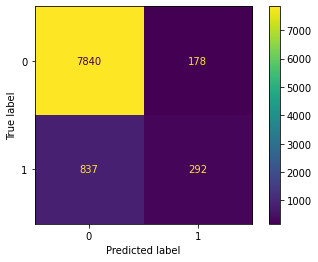

Accuracy:  0.8890346561714223
Recall:  0.25863596102745795
Precision:  0.6212765957446809


In [16]:
#Random Forest {'bootstrap': False, 'max_depth': None, 'max_samples': None, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 200}

rf = RandomForestClassifier(bootstrap=False,max_depth= None,max_samples = None,min_samples_leaf= 10,min_samples_split= 8, n_estimators= 200)
model_rf = rf.fit(X_train,Y_train)
values_predicted =model_rf.predict(X_test)
metrics(Y_test.to_numpy(),values_predicted)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 1, ..., 0, 1, 0])

array([0, 0, 1, ..., 0, 0, 0])

[[7927   91]
 [ 913  216]]


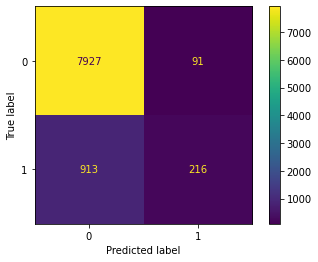

Accuracy:  0.8902372362523232
Recall:  0.1913197519929141
Precision:  0.7035830618892508


In [17]:
#Logistic Regression {'C': 5, 'penalty': 'l2', 'solver': 'sag'}

lr = LogisticRegression(C= 5,penalty='l2',solver= 'sag')
model_lr = lr.fit(X_train,Y_train)
values_predicted =model_lr.predict(X_test)
metrics(Y_test.to_numpy(),values_predicted)